<a href="https://colab.research.google.com/github/DilshadPt/ai-ml-course/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/My Drive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
num_rows, num_columns = df.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')


The dataset contains 1898 rows and 9 columns.


#### Observations: The dataset contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values with mean (you can use other methods like median or mode as well)
df.fillna(df.mean(), inplace=True)

# Check again for missing values after filling
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Missing values after handling:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


<ipython-input-9-39d1f016d7fd>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Get the statistical summary of the data
summary = df['food_preparation_time'].describe()

# Extract specific statistics
minimum_time = summary['min']
average_time = summary['mean']
maximum_time = summary['max']

# Print the results
print(f"Minimum food preparation time: {minimum_time} minutes")
print(f"Average food preparation time: {average_time} minutes")
print(f"Maximum food preparation time: {maximum_time} minutes")

Minimum food preparation time: 20.0 minutes
Average food preparation time: 27.371970495258168 minutes
Maximum food preparation time: 35.0 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Count the number of orders that are not rated
unrated_orders = df['rating'].isnull().sum()

# Print the result
print(f'The number of orders not rated: {unrated_orders}')

The number of orders not rated: 0


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

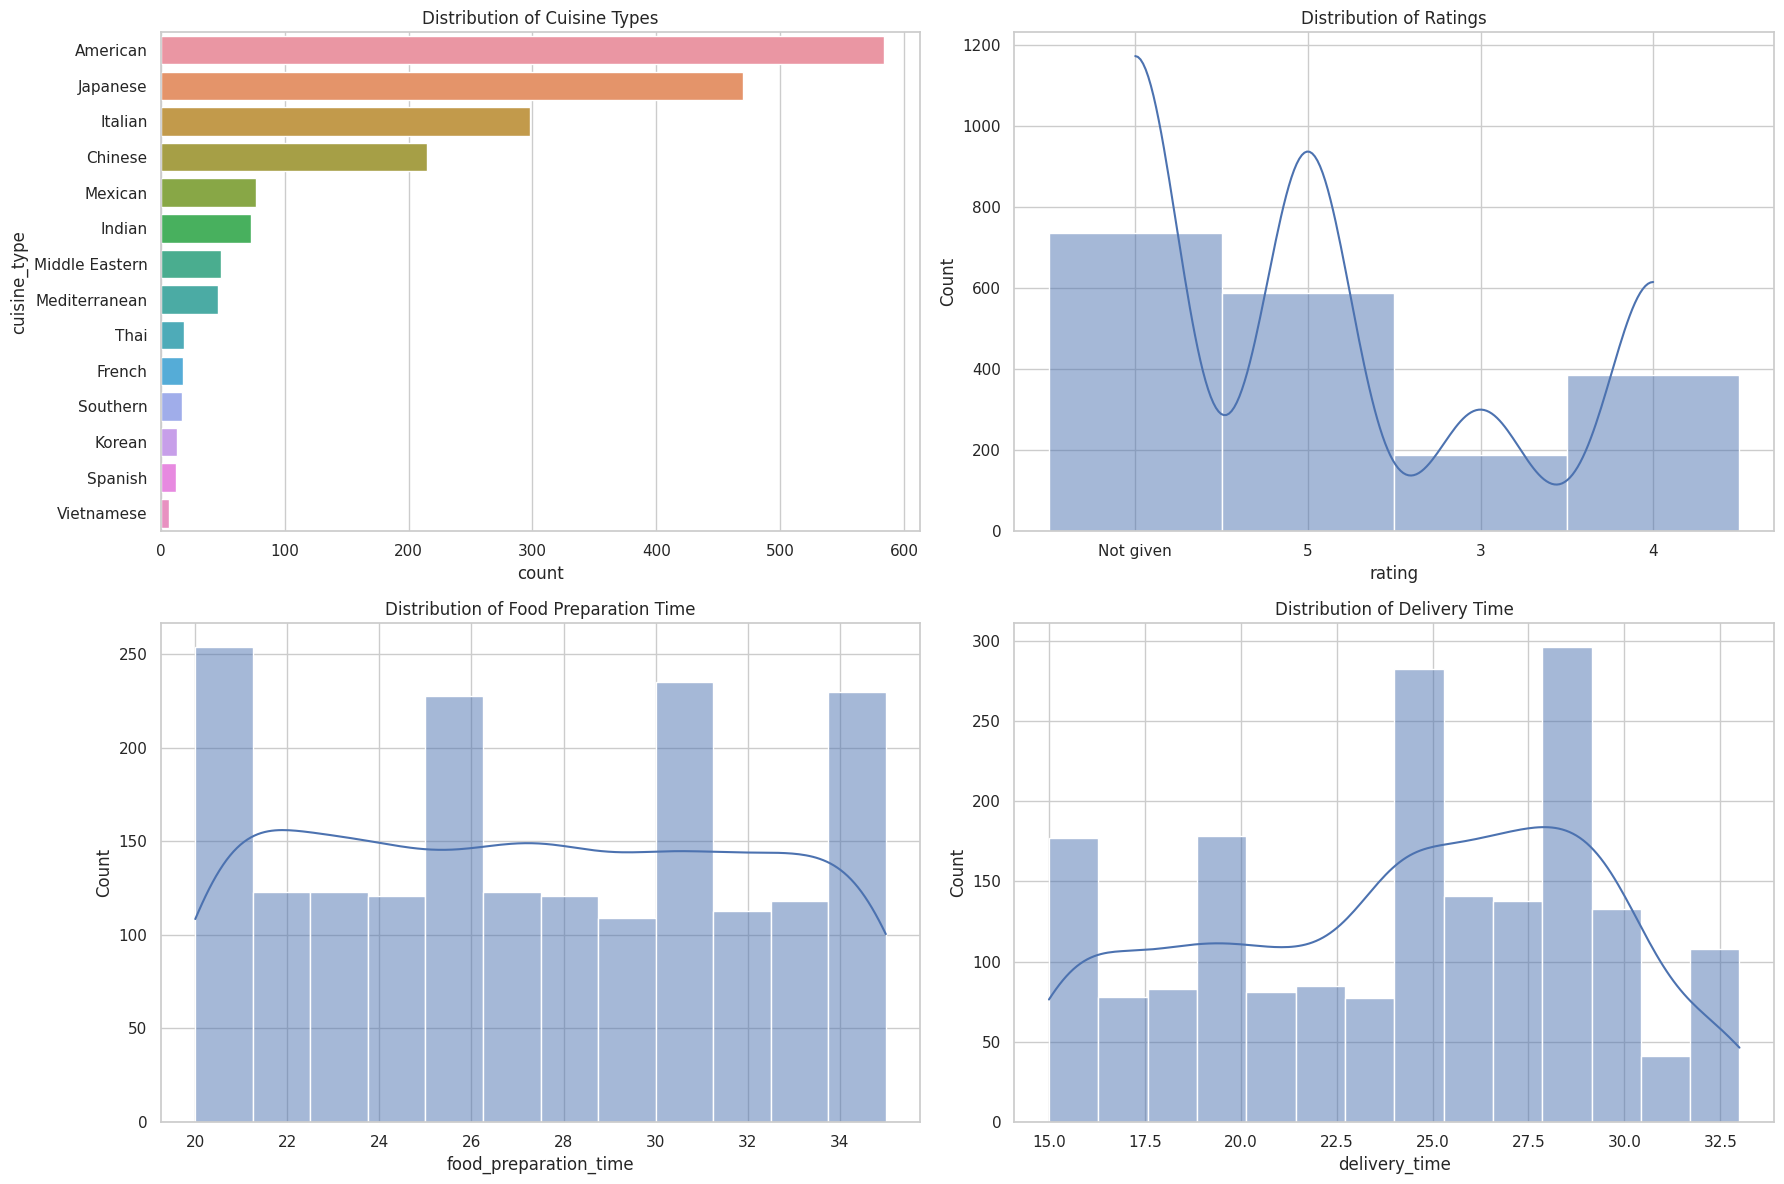

In [12]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Create subplots to explore variables
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of Cuisine Types
plt.subplot(2, 2, 1)
sns.countplot(y='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')

# Plot 2: Distribution of Ratings
plt.subplot(2, 2, 2)
sns.histplot(df['rating'].dropna(), kde=True)
plt.title('Distribution of Ratings')

# Plot 3: Distribution of Food Preparation Time
plt.subplot(2, 2, 3)
sns.histplot(df['food_preparation_time'].dropna(), kde=True)
plt.title('Distribution of Food Preparation Time')

# Plot 4: Distribution of Delivery Time
plt.subplot(2, 2, 4)
sns.histplot(df['delivery_time'].dropna(), kde=True)
plt.title('Distribution of Delivery Time')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# Count the number of orders for each restaurant and get the top 5
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Print the top 5 restaurants
print("Top 5 restaurants in terms of the number of orders received:")
print(top_restaurants)


Top 5 restaurants in terms of the number of orders received:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Filter data for orders placed on weekends (Saturday and Sunday)
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
if not weekend_orders.empty:
    most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()
    print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")
else:
    print("No orders placed on weekends in the dataset.")

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Filter data for orders that cost more than 20 dollars
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of expensive orders
percentage_expensive_orders = (len(expensive_orders) / len(df)) * 100

# Print the percentage
print(f"Percentage of orders costing more than 20 dollars: {percentage_expensive_orders:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean order delivery time
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Count the number of orders for each customer and get the top 3
top_customers = df['customer_id'].value_counts().head(3)

# Calculate 20% discount for the top 3 customers
discounted_customers = top_customers.index
discounted_orders = top_customers.values
discounted_orders_with_discount = [int(order * 0.8) for order in discounted_orders]

# Print the top 3 customers and the number of orders they placed after applying the discount
for i in range(len(discounted_customers)):
    print(f"Customer ID: {discounted_customers[i]}, Orders Placed: {discounted_orders_with_discount[i]}")

Customer ID: 52832, Orders Placed: 10
Customer ID: 47440, Orders Placed: 8
Customer ID: 83287, Orders Placed: 7


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


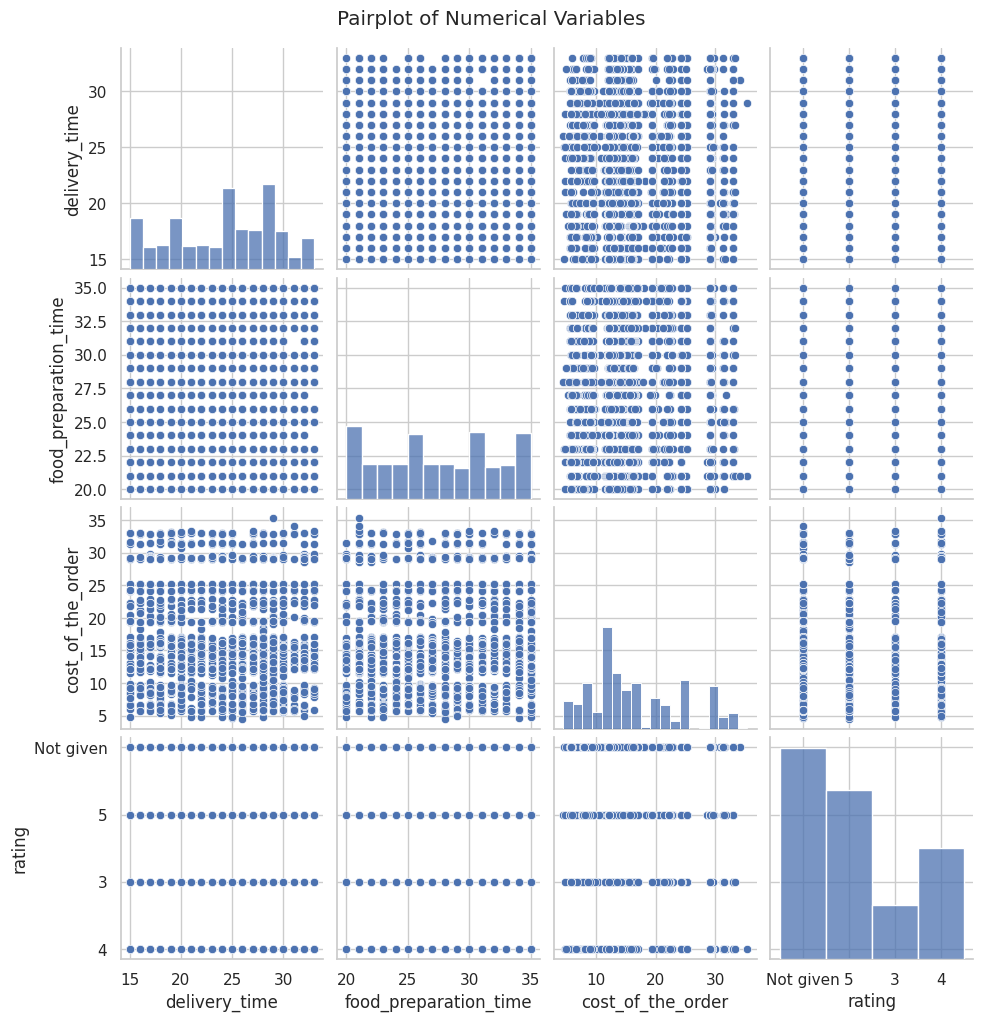

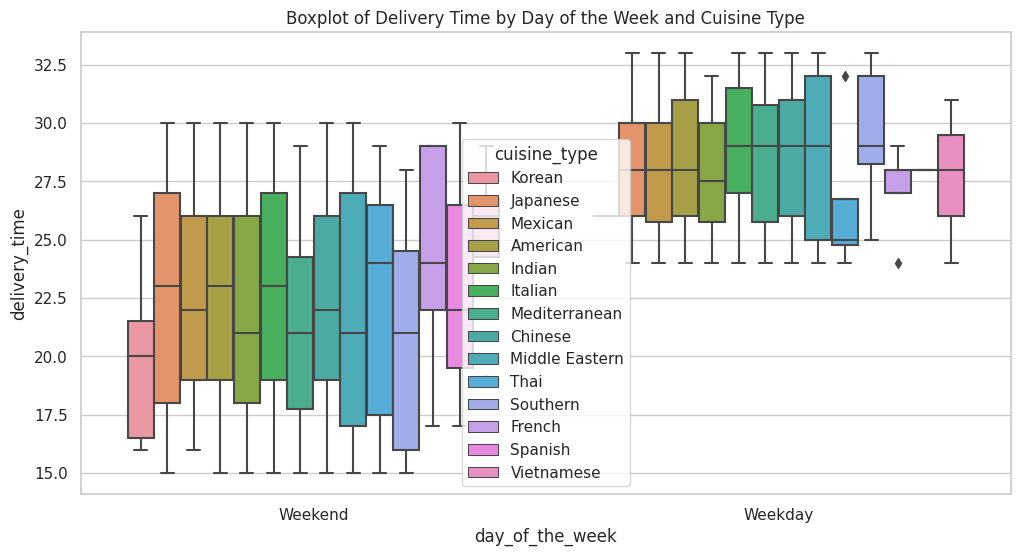

In [22]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Multivariate Analysis: Relationship between numerical variables (delivery_time, food_preparation_time, cost, rating)
sns.pairplot(df, vars=['delivery_time', 'food_preparation_time', 'cost_of_the_order', 'rating'])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)  # y parameter adjusts the distance between title and plot

# Multivariate Analysis: Relationship between numerical and categorical variables (day_of_the_week and cuisine_type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', hue='cuisine_type', data=df)
plt.title('Boxplot of Delivery Time by Day of the Week and Cuisine Type')

# Show the plots
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [25]:
# Replace "Not Given" ratings with NaN
df['rating'].replace('Not Given', pd.NA, inplace=True)

# Convert the 'rating' column to numeric (excluding NaN values)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group data by restaurant names and calculate rating count and average rating
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on the given criteria
eligible_restaurants = restaurant_ratings.dropna().loc[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [27]:
# Calculate the commission for each order
commission_total = 0

for index, row in df.iterrows():
    cost = row['cost_of_the_order']
    if cost > 20:
        commission = cost * 0.25  # 25% commission for orders > $20
    elif cost > 5:
        commission = cost * 0.15  # 15% commission for orders > $5
    else:
        commission = 0  # No commission for orders <= $5
    commission_total += commission

# Calculate the net revenue
total_revenue = df['cost_of_the_order'].sum()
net_revenue = total_revenue - commission_total

# Print the net revenue generated by the company
print(f"Net revenue generated by the company across all orders: ${net_revenue:.2f}")

Net revenue generated by the company across all orders: $25148.52


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [28]:
# Calculate total time required for each order (food preparation time + delivery time) in minutes
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to get delivered
orders_more_than_60_minutes = df[df['total_delivery_time'] > 60]
percentage_orders_more_than_60_minutes = (len(orders_more_than_60_minutes) / len(df)) * 100

# Print the percentage
print(f"Percentage of orders taking more than 60 minutes to get delivered: {percentage_orders_more_than_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [30]:
# Calculate total delivery time for each order (food preparation time + delivery time) in minutes
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Group data by day_of_the_week and calculate the mean delivery time for weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['total_delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print("Mean delivery time for weekdays and weekends:")
print(mean_delivery_time_by_day)

Mean delivery time for weekdays and weekends:
day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Food Preparation Time Analysis:

The food preparation time ranges from 20 to 35 minutes, with an average of approximately 27.37 minutes, indicating overall efficient kitchen operations.
* Top Restaurants:

The top five restaurants based on the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, with Shake Shack leading at 219 orders.
* Weekend Cuisine Preference:

American cuisine is the most popular choice on weekends, suggesting a potential market demand for weekend specials in this category.
* Order Cost Analysis:

About 29.24% of the orders cost more than $20, indicating a significant portion of the customer base is willing to pay premium prices for their meals.
* Top Customers:

Customers with IDs 52832, 47440, and 83287 placed 10, 8, and 7 orders respectively, showcasing high customer loyalty.
* Promotional Offer Eligibility:

Restaurants like Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop, with consistently high ratings and substantial order counts, qualify for promotional offers, encouraging more business from these establishments.
* Company Revenue:

The company generated a net revenue of approximately $25,148.52, reflecting a successful business operation.
* Delivery Time Analysis:

Roughly 10.54% of orders take more than 60 minutes to be delivered, indicating room for improvement in optimizing delivery processes.
* Weekday vs. Weekend Delivery:

On average, weekend deliveries are slightly faster (49.91 minutes) compared to weekdays (55.55 minutes), suggesting potential staffing adjustments or operational enhancements during the week to improve efficiency.

### Recommendations:

*  Efficiency Optimization:

Continue monitoring and optimizing food preparation processes to maintain the current efficiency levels, ensuring prompt order preparation.
*  Promotional Strategies:

Strengthen partnerships with top-performing restaurants to create exclusive promotions, enticing more customers and fostering long-term collaborations.
*  Weekend Specials:

Capitalize on the preference for American cuisine on weekends by collaborating with restaurants in this category to offer special weekend menu items, attracting more customers during this period.
*  Premium Menu Expansion:

Introduce new premium dishes or meal packages to cater to the 29.24% of customers willing to spend more than $20 on their orders, potentially increasing the average order value.
*  Customer Engagement:

Engage with loyal customers (e.g., customer IDs 52832, 47440, and 83287) through loyalty programs or exclusive offers, enhancing their satisfaction and encouraging repeat business.
*  Delivery Time Optimization:

Focus on orders taking longer than 60 minutes to be delivered. Implement strategies such as optimizing delivery routes and incentivizing quicker deliveries to enhance customer experience.
*  Operational Adjustments:

Consider operational adjustments during weekdays to match the faster delivery times observed on weekends, ensuring consistent service quality throughout the week.
*  Data-Driven Decision Making:

Regularly analyze customer feedback, ratings, and delivery times to identify patterns and trends, enabling data-driven decisions to improve various aspects of the business.
*  Sustainability Initiatives:

Consider implementing eco-friendly packaging options or collaborating with restaurants promoting sustainable practices, appealing to environmentally conscious customers and enhancing the company's image.

---